<a href="https://colab.research.google.com/github/OmarK920/Deep-Learning-Projects/blob/main/MNIST_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this simple project i have used the famous MINST dataset to classify numbers from 0 to 10 using neural netwroks**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#here i loaded the dataset automatically
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#you must flatten so it get transformed from 2-D to 1-d array by which neural network can use 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In neural networks, an epoch refers to a single pass through the entire training dataset during the training process. During each epoch, the model is presented with the training data, and its parameters are updated based on the prediction errors it makes. The number of epochs specified in the training process determines how many times the model will be trained on the entire training dataset.

For example, if you specify that you want to train the model for 10 epochs, then the model will be trained on the training data 10 times, each time seeing the entire training dataset.

In general, more epochs can lead to better model performance, but at the cost of longer training time and the risk of overfitting. Overfitting occurs when the model is trained for too many epochs and starts to memorize the training data instead of learning the underlying patterns in the data.

In [5]:
#here i built my neural network , metrics[accuracy] will show you the accuracy of your model 
#when you fit your model , you are traning it 

model_1 = keras.Sequential([
    keras.layers.Dense(units = 50 , activation = 'relu'),
    keras.layers.Dense(units = 25 , activation = 'relu'),
    keras.layers.Dense(units = 10 , activation = 'softmax'),

])

model_1.compile( loss='sparse_categorical_crossentropy',optimizer = 'adam' , metrics =['accuracy'])

model_1.fit(X_train_flattened, y_train, epochs=10)




Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6495 - accuracy: 0.7902
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2866 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2315 - accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2012 - accuracy: 0.9432
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1797 - accuracy: 0.9474
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1589 - accuracy: 0.9535
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1474 - accuracy: 0.9572
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1339 - accuracy: 0.9606
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.129

In [12]:
model_1.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.9533


[0.19431428611278534, 0.9532999992370605]

In [8]:
#the prediction as you see has 10 scores , each score is the propability of each neuron in the outputlayer 
y_test_pred = model_1.predict(X_test_flattened)
y_test_pred[0]




313/313 [==============================] - 1s 2ms/step


array([2.0808069e-14, 4.0620397e-04, 8.4697604e-05, 1.4634768e-04,
       2.0165444e-07, 3.4419645e-06, 4.7604684e-19, 9.9935895e-01,
       4.2858761e-09, 1.2810312e-07], dtype=float32)

In [9]:
#           VERY IMPORTANT

# here i converted the propabilities produces by each neuron into thier respective class predictions 




y_predicted_labels = [np.argmax(i) for i in y_test_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [10]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    1,    0,    3,    3,    2,    2,    1],
       [   0, 1118,    4,    3,    1,    2,    2,    0,    5,    0],
       [  12,    5,  968,    7,   12,    1,    2,   10,   14,    1],
       [   1,    0,    8,  970,    2,    2,    0,    6,   16,    5],
       [   2,    2,    5,    0,  936,    0,    9,    1,    5,   22],
       [   4,    0,    1,   45,    2,  818,    7,    2,    6,    7],
       [  10,    3,    1,    0,   15,    4,  917,    0,    8,    0],
       [   2,    7,   15,    7,    5,    0,    0,  983,    0,    9],
       [  12,    2,    6,   12,    6,   15,    3,    3,  909,    6],
       [   6,    5,    1,   10,   23,    3,    0,   10,    5,  946]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

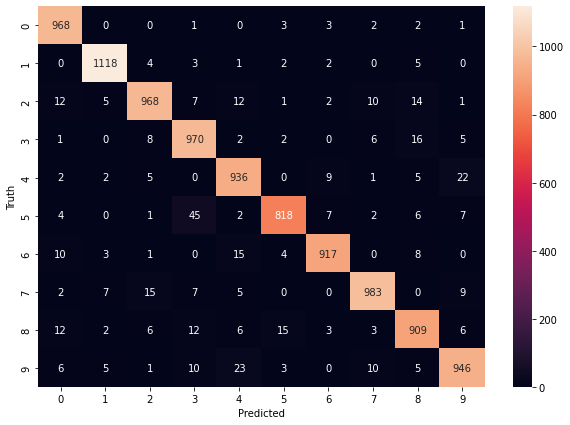

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
###############################################################################33

In [15]:
# THIS IS THE RIGHT WAY TO DO IT OR THE BETTER WAY , WHY ? BECAUSE I HAVE PREPROCESSED THE IMAGES BEFORE BUILDING THE MODEL

In [18]:

# Load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)




In [19]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(28 * 28,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2488 - accuracy: 0.9268 - val_loss: 0.1346 - val_accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1068 - accuracy: 0.9676 - val_loss: 0.1070 - val_accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.0865 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0708 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0822 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0780 - val_accuracy

In [20]:
model.evaluate(X_test ,y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.1025 - accuracy: 0.9748


[0.102524533867836, 0.9747999906539917]

In [22]:
y_test_pred2 = model.predict(X_test)
y_test_pred2[0]

313/313 [==============================] - 1s 2ms/step


array([4.2481429e-10, 3.0552971e-10, 3.4551275e-09, 3.0058749e-07,
       1.1581279e-14, 5.5848427e-11, 3.7514954e-15, 9.9999958e-01,
       2.4357812e-12, 3.1897038e-09], dtype=float32)

In [25]:


y_predicted_labels = [np.argmax(i) for i in y_test_pred2]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]